Import the 🦸🏾‍♀️"Avengers"🦹🏻 data from the [FiveThirtyEight data repository on GitHub](https://github.com/fivethirtyeight/data/blob/master/avengers/avengers.csv).

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
avenger = read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/avengers/avengers.csv',
                      col_types = cols())

In [4]:
avenger  %>% head

URL,Name/Alias,Appearances,Current?,Gender,Probationary Introl,Full/Reserve Avengers Intro,Year,Years since joining,Honorary,⋯,Return1,Death2,Return2,Death3,Return3,Death4,Return4,Death5,Return5,Notes
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
http://marvel.wikia.com/Henry_Pym_(Earth-616),"Henry Jonathan ""Hank"" Pym",1269,YES,MALE,NA,Sep-63,1963,52,Full,⋯,NO,NA,NA,NA,NA,NA,NA,NA,NA,Merged with Ultron in Rage of Ultron Vol. 1. A funeral was held.
http://marvel.wikia.com/Janet_van_Dyne_(Earth-616),Janet van Dyne,1165,YES,FEMALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,Dies in Secret Invasion V1:I8. Actually was sent tto Microverse later recovered
http://marvel.wikia.com/Anthony_Stark_(Earth-616),"Anthony Edward ""Tony"" Stark",3068,YES,MALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,"Death: ""Later while under the influence of Immortus Stark committed a number of horrible acts and was killed.' This set up young Tony. Franklin Richards later brought him back"
http://marvel.wikia.com/Robert_Bruce_Banner_(Earth-616),Robert Bruce Banner,2089,YES,MALE,NA,Sep-63,1963,52,Full,⋯,YES,NA,NA,NA,NA,NA,NA,NA,NA,"Dies in Ghosts of the Future arc. However ""he had actually used a hidden Pantheon base to survive"""
http://marvel.wikia.com/Thor_Odinson_(Earth-616),Thor Odinson,2402,YES,MALE,NA,Sep-63,1963,52,Full,⋯,YES,YES,NO,NA,NA,NA,NA,NA,NA,Dies in Fear Itself brought back because that's kind of the whole point. Second death in Time Runs Out has not yet returned
http://marvel.wikia.com/Richard_Jones_(Earth-616),Richard Milhouse Jones,612,YES,MALE,NA,Sep-63,1963,52,Honorary,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


Make an ECDF plot 📊 of `Appearances`.

(❗️Hint: combine `arrange`, `mutate` and `row_number`/`rank` to produce a new column to encode with y-position.)

In [27]:
df_avenger = 
avenger  %>% 
    select(Appearances, 'Name/Alias' )  %>% 
    mutate(frac_appearances = rank(Appearances, ties.method = 'random') / n())
    arrange(frac_appearances)  %>% 
    head




ERROR: Error in arrange(frac_appearances): object 'frac_appearances' not found


In [29]:
##Confused why the code above is working but not this code

avenger  %>% 

    arrange(Appearances)  %>% 
    mutate(rn = row_number(), frac_appearances = rn / n())  %>% 
    select(appearances, rn, frac_appearances)  %>% 
    head


ERROR: Error: Can't subset columns that don't exist.
[31m✖[39m Column `appearances` doesn't exist.


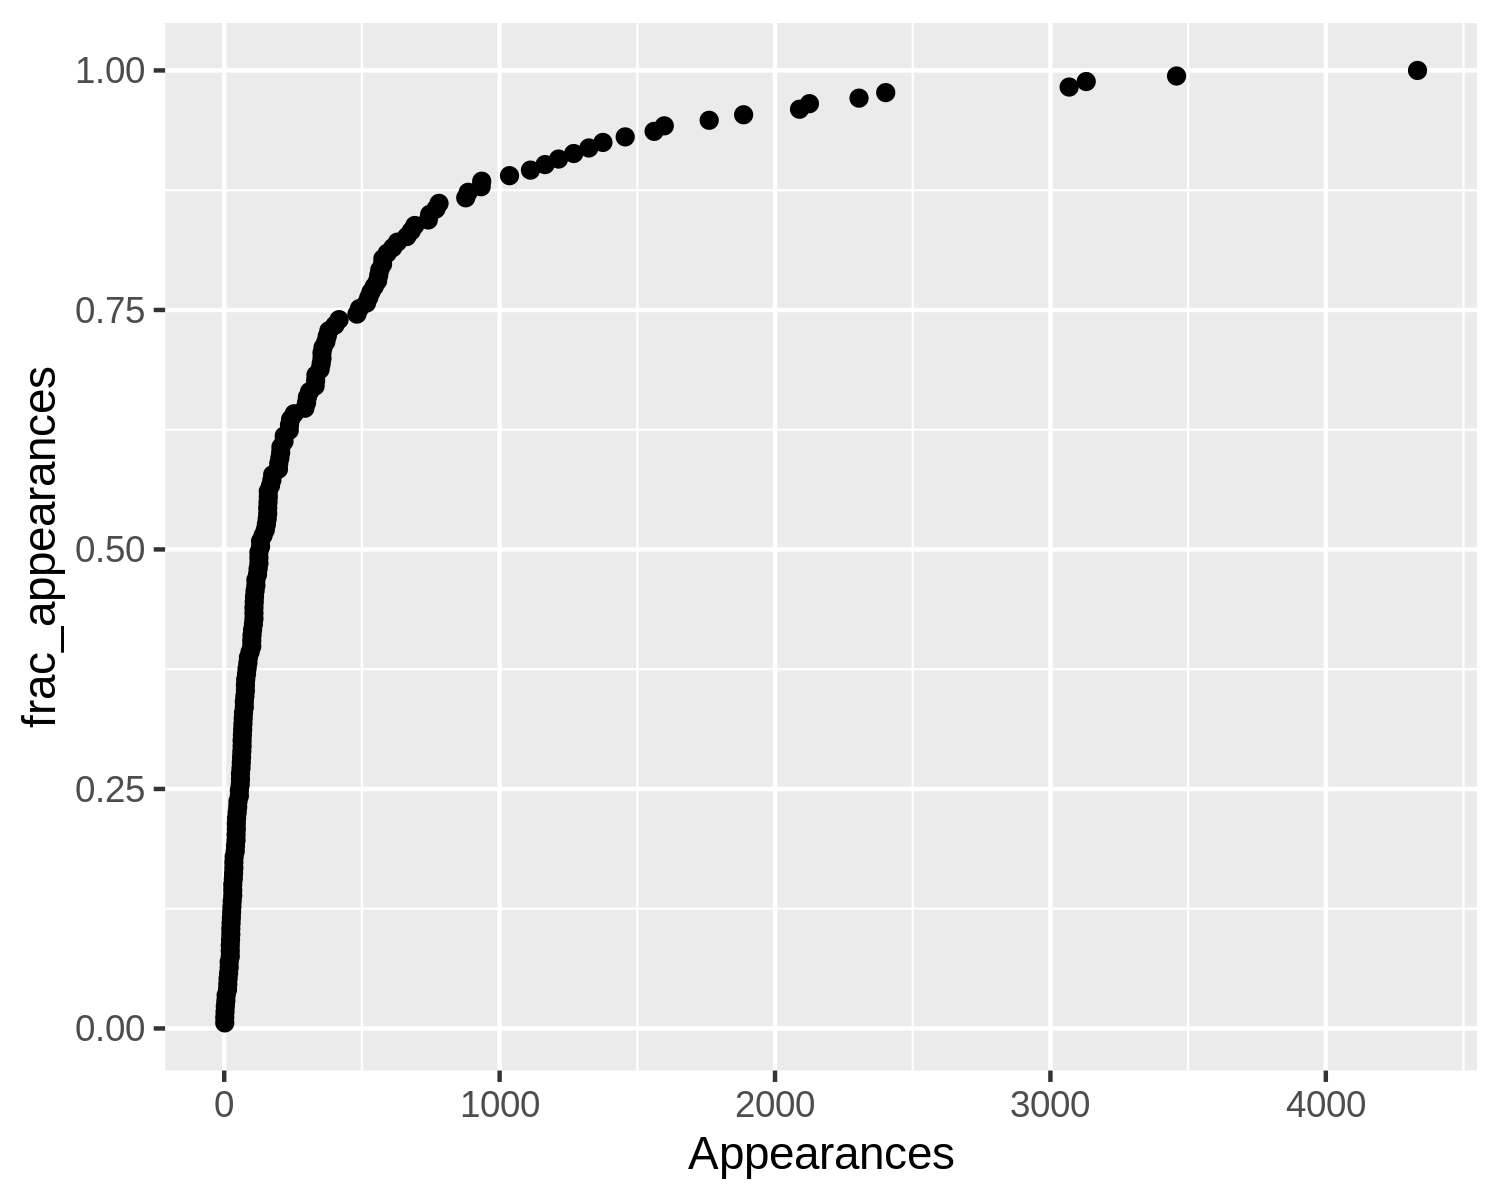

In [28]:
p = ggplot(df_avenger, aes(x = Appearances, y = frac_appearances))
p = p + geom_point()
p